# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns

In [87]:
df_raw = pd.read_csv("admissions.csv")
df = df_raw.dropna() 
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


### What are the predictors and dependent variable ?

In [88]:
##Dependent variable is admit (binary), and predictors are GRE score, GPA score, and prestige of the school the student applied from

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

In [89]:
#Problem Statement - how do gre, gpa, and school prestige affect the outcome of whether or not a student is admitted to a college? Are they significantly relevant factors at all?

In [90]:
# Hypothesis - GRE, GPA, and Prestige are all stastically significant, and the higher your GRE and GPA and Prestige, the likelier you are to get admitted

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

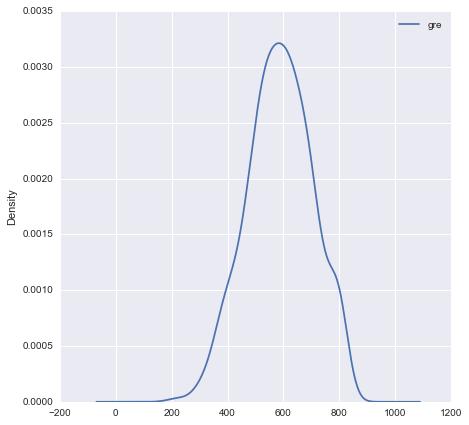

In [91]:
pd.DataFrame(df['gre']).plot(kind='density', figsize=(7,7))

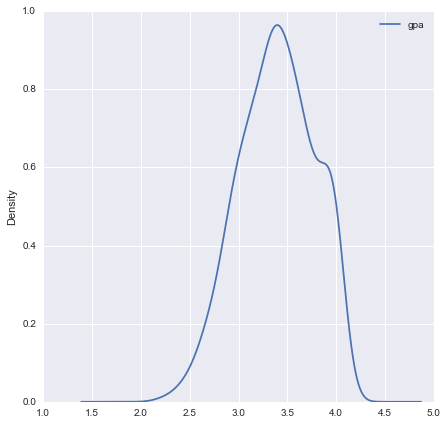

In [92]:
pd.DataFrame(df['gpa']).plot(kind='density', figsize=(7,7))

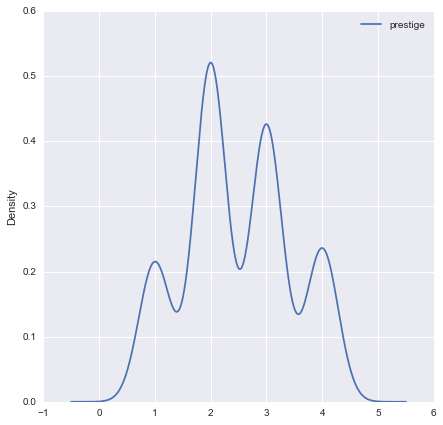

In [93]:
pd.DataFrame(df['prestige']).plot(kind='density', figsize=(7,7))

### FInd the correlation of each feature with admission

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.775)


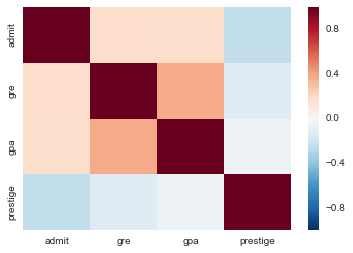

In [94]:
correlations = df[['admit', 'gre', 'gpa', 'prestige']].corr()
print correlations
print sns.heatmap(correlations)


### How do you deal with the prestige feature?

In [105]:
## Use get dummies and drop one of the values (avoids dummy variable trap)
df1 = pd.get_dummies(df1,prefix=None,columns=["prestige"])
df1.head()

,const,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,1,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,1,640.0,3.19,0.0,0.0,0.0,1.0
4,1,0,520.0,2.93,0.0,0.0,0.0,1.0


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [106]:
features=[u'gre', u'gpa',u'prestige_1.0',u'prestige_2.0', u'prestige_3.0']

In [107]:
from sklearn import preprocessing as pp
# Remember to scale the data in order to make understanding the model 
# coeeficients easier
scaler = pp.StandardScaler().fit(df1[features])
scaled_df1 = pd.DataFrame(scaler.fit_transform(df1[features]))
scaled_df1.columns = features
scaled_df1.head()



,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0
0,-1.798524,0.573457,-0.426084,-0.770959,1.510295
1,0.624209,0.731464,-0.426084,-0.770959,1.510295
2,1.835576,1.600504,2.346955,-0.770959,-0.662122
3,0.451157,-0.532595,-0.426084,-0.770959,-0.662122
4,-0.587158,-1.217294,-0.426084,-0.770959,-0.662122


In [109]:
df1 = sm.tools.add_constant(df1)
df1.head()

,const,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,1,0,380.0,3.61,0.0,0.0,1.0,0.0
1,1,1,660.0,3.67,0.0,0.0,1.0,0.0
2,1,1,800.0,4.00,1.0,0.0,0.0,0.0
3,1,1,640.0,3.19,0.0,0.0,0.0,1.0
4,1,0,520.0,2.93,0.0,0.0,0.0,1.0


In [110]:
features=[u'const',u'gre', u'gpa',u'prestige_1.0',u'prestige_2.0', u'prestige_3.0']
y = df1['admit']
X = df1[features]

In [111]:
lm2 = sm.Logit(y,X)
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 01 Dec 2016   Pseudo R-squ.:                 0.08166
Time:                        00:55:48   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           -5.4303      1.140     -4.764      0.000        -7.664    -3.196
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_1.0     1.5534      0.417      3.721      0.000         0.735     2.372
prestige_2.0     0.8733      0.367      2.378      0.017         0.153     1.593
prestige_3.0     0.2147      0.393      0.547      0.584        -0.555     0.984
================================================================================
"""

### What is the most important feature that contributes to the students probability of admission? 

In [112]:
###Being from a prestige 1 school (as opposed to prestige 4, the omitted value) seems to provide the greatest lift to the odds of getting in.

### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [113]:
from sklearn.linear_model import LogisticRegression
lm2 = LogisticRegression()

In [114]:
features=[u'const',u'gre', u'gpa',u'prestige_1.0',u'prestige_2.0', u'prestige_3.0']
y = pd.DataFrame(df1['admit'])
X = df1[features]

In [115]:
lm2.fit(X,y)

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [116]:
print lm2.coef_
print lm2.intercept_
print df1.admit.mean()

[[-1.58458246  0.00182563  0.26553082  1.22528104  0.56898046  0.01121686]]
[-1.58458246]
0.317380352645


In [117]:
print np.exp(lm2.coef_)
print np.exp(lm2.intercept_)
print df1.admit.mean()

[[ 0.20503339  1.0018273   1.30412304  3.40512293  1.76646516  1.01128001]]
[ 0.20503339]
0.317380352645


In [118]:
probs = pd.DataFrame(lm2.predict_proba(X))
df1['prob_admit'] = probs.iloc[0:,1]
df1.head()

,const,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,prob_admit
0,1,0,380.0,3.61,0.0,0.0,1.0,0.0,0.181586
1,1,1,660.0,3.67,0.0,0.0,1.0,0.0,0.273183
2,1,1,800.0,4.00,1.0,0.0,0.0,0.0,0.640779
3,1,1,640.0,3.19,0.0,0.0,0.0,1.0,0.239811
4,1,0,520.0,2.93,0.0,0.0,0.0,1.0,0.191262


In [122]:
df1['prestige']=df['prestige']
df1.head()

,const,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,prob_admit,prestige
0,1,0,380.0,3.61,0.0,0.0,1.0,0.0,0.181586,3.0
1,1,1,660.0,3.67,0.0,0.0,1.0,0.0,0.273183,3.0
2,1,1,800.0,4.00,1.0,0.0,0.0,0.0,0.640779,1.0
3,1,1,640.0,3.19,0.0,0.0,0.0,1.0,0.239811,4.0
4,1,0,520.0,2.93,0.0,0.0,0.0,1.0,0.191262,4.0


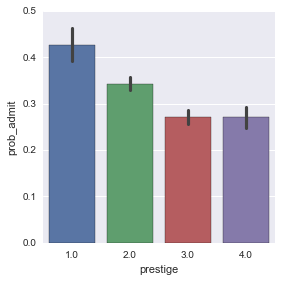

In [124]:
sns.factorplot(x='prestige',y='prob_admit',data=df1,kind='bar')

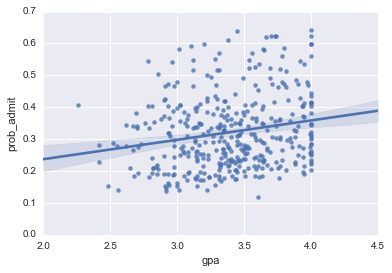

In [129]:
sns.regplot(x='gpa',y='prob_admit',data=df1)